# **ECS7024: Statistics for Artificial Intelligence and Data Science Coursework 3**

## **Contents** ##

### 1. Section 1: Data Preparation
  * Section 1.1: Outline
  * Section 1.2: Loading the both Area and region (Location) Data 
  * Section 1.3: Separating the region data (with ‘E12’ prefix codes) from the area data 
  * Section 1.4: Merging region data from Location data with the Area data
  * Section 1.5: Replacing missing data in area and region data

### 2. Section 2: Trends
  * Section 2.1: Average Flat and Detached property prices over 36 month period

### 3. Section 3: Price Changes
  * Section 3.1: Calculating the change in the price of flats(July 2017 to July 2018)
  * Section 3.2: Graphs showing the change in prices of flats(July 2017 to July 2018)


### 4. Section 4: Statistical Analysis
  * Section 4.1: Cross-tabulation of the number of areas in which prices have either increased or decreased
  * Section 4.2: Chi-Square test

# Section 1: Data Preparation

## *Section 1.1: Outline*

This notebook looks at the average price of 4 different properties (Detached, Semi-detached, Terraced and Flat) over a period of 36 months in different areas across the country. The aim of the analysis is to look at how the average prices of each of the properties has changed over the 36 months period, how the average price of the properties differ in different locations around the country and a comparison of the average prices for each of the 4 different properties. 

## *Section 1.2: Loading the both Area and region (Location) Data*

The Area and Location data are both loaded into the notebook and the dates in the Area data are formatted into the UK '*Day-First*' format. The dates are then placed in a separate column which was called '*Month*'.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
average = pd.read_csv('average-property-price.csv')
average = average.assign(Month = pd.to_datetime(
average['Date'], dayfirst=True)).drop(labels='Date', axis=1)
average


,Area,Code,Detached,Semi,Terraced,Flat,Month
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01
...,...,...,...,...,...,...,...
5755,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010,2019-04-01
5756,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930,2019-05-01
5757,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830,2019-06-01
5758,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990,2019-07-01


*The area dataset in the table above shows the average prices of the 4 properties, the dates, the area code and the region code*

In [3]:
location = pd.read_csv('location-codes.csv')
location

,AuthorityCode,AuthorityName,RegionCode,RegionName
0,E06000001,Hartlepool,E12000001,North East
1,E06000002,Middlesbrough,E12000001,North East
2,E06000003,Redcar and Cleveland,E12000001,North East
3,E06000004,Stockton-on-Tees,E12000001,North East
4,E06000005,Darlington,E12000001,North East
...,...,...,...,...
149,E10000029,Suffolk,E12000006,East of England
150,E10000030,Surrey,E12000008,South East
151,E10000031,Warwickshire,E12000005,West Midlands
152,E10000032,West Sussex,E12000008,South East


*The location dataset in the table above shows the region name, authority code, region code and authority name*

## *Section 1.3: Separating the region data (with ‘E12’ prefix codes) from the area data*

In [4]:
code_1 = average[average['Code'].str.contains('E12')]
code_1

,Area,Code,Detached,Semi,Terraced,Flat,Month
5436,North East,E12000001,208117.1739,125683.3380,101385.68860,89361.51412,2016-09-01
5437,North East,E12000001,208519.1158,125464.3201,99998.54363,89716.48508,2016-10-01
5438,North East,E12000001,210555.4948,126082.1090,100433.81080,90065.71739,2016-11-01
5439,North East,E12000001,211728.7243,127186.0647,102150.75450,91195.50119,2016-12-01
5440,North East,E12000001,205942.7099,123088.4533,98112.30132,88170.43214,2017-01-01
...,...,...,...,...,...,...,...
5755,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010,2019-04-01
5756,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930,2019-05-01
5757,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830,2019-06-01
5758,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990,2019-07-01


*A table of the region data only containing the E12 prefix code*

In [5]:
code_2 = average[~average['Code'].str.contains('E12')]
code_2

,Area,Code,Detached,Semi,Terraced,Flat,Month
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01
...,...,...,...,...,...,...,...
5431,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830,2019-04-01
5432,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010,2019-05-01
5433,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920,2019-06-01
5434,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220,2019-07-01


*A table of the region data excluding the E12 prefix code*

 ## *Section 1.4: Merging region data from Location data with the Area data*

In [6]:
location = location.rename(columns={'AuthorityCode':'Code','AuthorityName':'Area'})
location2 = location.drop(columns = ['RegionCode']) 
location2


,Code,Area,RegionName
0,E06000001,Hartlepool,North East
1,E06000002,Middlesbrough,North East
2,E06000003,Redcar and Cleveland,North East
3,E06000004,Stockton-on-Tees,North East
4,E06000005,Darlington,North East
...,...,...,...
149,E10000029,Suffolk,East of England
150,E10000030,Surrey,South East
151,E10000031,Warwickshire,West Midlands
152,E10000032,West Sussex,South East


In [7]:
code_E12 = pd.merge(code_2,location2)
code_E12

,Area,Code,Detached,Semi,Terraced,Flat,Month,RegionName
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01,North East
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01,North East
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01,North East
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01,North East
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01,North East
...,...,...,...,...,...,...,...,...
5071,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830,2019-04-01,West Midlands
5072,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010,2019-05-01,West Midlands
5073,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920,2019-06-01,West Midlands
5074,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220,2019-07-01,West Midlands


*The table above shows the area data for the E12 prefix code including the region names*

 ## *Section 1.5: Replacing missing data in area and region data*

In [8]:
code_E12.isnull().sum()

Area           0
Code           0
Detached      36
Semi          36
Terraced      20
Flat           0
Month          0
RegionName     0
dtype: int64

The total number of missing values in each of the columns in the dataset are shown above. The missing values were then replaced by a zero value since most of the missing data was found to be from only one specific region. In order to check if the missing values have been replaced by zero the code below is used.

In [9]:
code_E12 = code_E12.fillna(0)
code_E12.isnull().sum()

Area          0
Code          0
Detached      0
Semi          0
Terraced      0
Flat          0
Month         0
RegionName    0
dtype: int64

# Section 2: Trends

## *Section 2.1: Average Flat and Detached property prices over 36 month period*

In [10]:
trend = code_E12.groupby(['Month'], as_index = True).sum()
trend

,Detached,Semi,Terraced,Flat
Month,,,,
2016-09-01,6.835580e+07,4.463671e+07,3.649785e+07,2.649547e+07
2016-10-01,6.836693e+07,4.454788e+07,3.629740e+07,2.652651e+07
2016-11-01,6.857179e+07,4.454071e+07,3.620752e+07,2.656010e+07
2016-12-01,6.871419e+07,4.449808e+07,3.615664e+07,2.662801e+07
2017-01-01,6.893626e+07,4.459730e+07,3.628429e+07,2.669830e+07
2017-02-01,6.882323e+07,4.451433e+07,3.624372e+07,2.684973e+07
2017-03-01,6.887067e+07,4.449719e+07,3.617596e+07,2.692041e+07
2017-04-01,6.914095e+07,4.458747e+07,3.631676e+07,2.712426e+07
2017-05-01,6.935946e+07,4.487216e+07,3.649882e+07,2.730907e+07


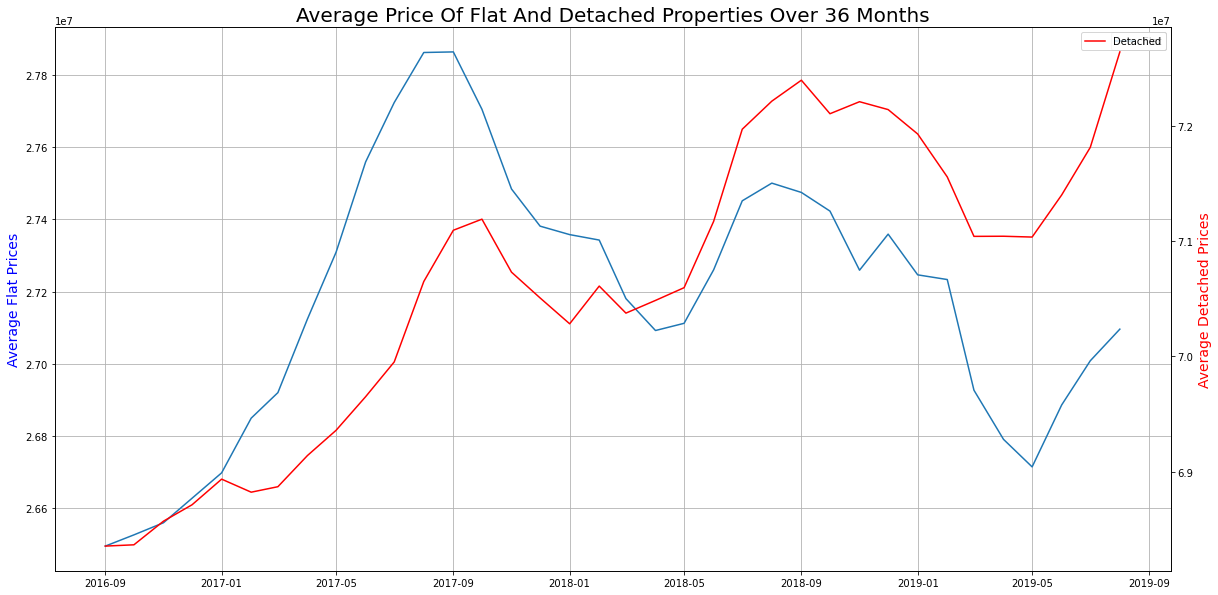

In [11]:
fig, a1 = plt.subplots(1, 1, figsize=(20, 10))
a1.plot(trend.loc[:,'Flat'], label='Flat')

a2 = a1.twinx() 
a2.plot(trend.loc[:,'Detached'], color='r', label = 'Detached')
a1.set_title('Average Price Of Flat And Detached Properties Over 36 Months', fontsize = 20)
a1.legend()
a2.legend()
a1.set_ylabel('Average Flat Prices', fontsize=14, color='b')
a2.set_ylabel('Average Detached Prices', fontsize=14, color='r')
a1.grid()

The graph above shows how the average price of Flats and Detached properties changed over the 36 month period. The average flat prices showed a large increase during the period between 05/2017 to 09/2017, reaching its highest average price value over the 36 month period. After reaching its peak, the average flat price did decrease and normalise. The average flat price did reach a low value around the period 05/2019 which was approximately similar to the average price in the period 09/2016.The average price of a detached property did also reach a peak during the same time as the flat properties but its largest price increase occured during the period between 05/2018 and 09/2018. Overall, the graph shows that the average prices of both properties increased during the 36 month period from 09/2016 to 09/2019.

# Section 3: Price Changes

 ## *Section 3.1: Calculating the change in the price of flats(July 2017 to July 2018)*

In this section the change in price of flats between July 2017 and July 2018 are analysed. In order to analyse the change in price the data for July 2017 and July 2018 have to be removed from the dataset. This is done using the code below.

In [12]:
start = '2017-07-01'
end = '2017-07-01'

In [13]:
a1 = (code_E12['Month']== start) 

In [14]:
jul_prices_17 = code_E12.loc[a1]
jul_prices_17

,Area,Code,Detached,Semi,Terraced,Flat,Month,RegionName
10,Hartlepool,E06000001,186030.1497,112168.0127,79436.27053,65007.84170,2017-07-01,North East
46,Middlesbrough,E06000002,187695.9901,111107.0273,79505.65683,69163.06963,2017-07-01,North East
82,Redcar and Cleveland,E06000003,187618.3790,117895.4611,89473.56935,65507.80990,2017-07-01,North East
118,Stockton-on-Tees,E06000004,210016.6510,123232.6999,95599.36140,83599.32806,2017-07-01,North East
154,Darlington,E06000005,227479.6970,136030.9295,102533.59940,87041.37973,2017-07-01,North East
...,...,...,...,...,...,...,...,...
4906,Suffolk,E10000029,353962.6700,222352.9988,181134.70370,140278.18370,2017-07-01,East of England
4942,Surrey,E10000030,786923.8580,455596.0847,366461.71500,270116.52610,2017-07-01,South East
4978,Warwickshire,E10000031,380046.1182,223519.0122,185720.66520,165676.94800,2017-07-01,West Midlands
5014,West Sussex,E10000032,529397.3694,342983.0789,276630.46710,193547.45490,2017-07-01,South East


*This table shows the data for July 2017*

In [15]:
jul_17 = jul_prices_17.groupby(['Area','RegionName'], as_index = False).sum()
jul_17

,Area,RegionName,Detached,Semi,Terraced,Flat
0,Barking and Dagenham,London,5.232112e+05,367543.0390,311272.31660,233026.92790
1,Barnet,London,1.186325e+06,700920.5033,530355.81640,403492.77130
2,Barnsley,Yorkshire and The Humber,1.814704e+05,112510.4640,91949.22437,73054.06885
3,Bath and North East Somerset,South West,5.263571e+05,326769.5624,281497.59370,242441.16080
4,Bedford,East of England,4.512317e+05,275799.8491,217677.95770,167562.35620
...,...,...,...,...,...,...
136,Wirral,North West,2.575059e+05,170354.1301,116994.97350,102486.68380
137,Wokingham,South East,6.142262e+05,388448.2301,306711.69400,233806.26640
138,Wolverhampton,West Midlands,2.229979e+05,140405.4821,114347.60300,81530.88640
139,Worcestershire,West Midlands,3.445100e+05,210180.4502,166865.00150,127758.55150


*This table shows the data for July 2017 grouped in terms of its area and regions*

In [16]:
start1 = '2018-07-01'
end1 = '2018-07-01'
a2 = (code_E12['Month']== start1)
jul_prices_18 = code_E12.loc[a2]
jul_prices_18

,Area,Code,Detached,Semi,Terraced,Flat,Month,RegionName
22,Hartlepool,E06000001,180836.5829,108917.0807,76843.00978,61116.82158,2018-07-01,North East
58,Middlesbrough,E06000002,195242.2776,114478.7800,81719.20818,69313.90788,2018-07-01,North East
94,Redcar and Cleveland,E06000003,193610.9431,121328.4945,91356.79184,64802.79724,2018-07-01,North East
130,Stockton-on-Tees,E06000004,217157.6600,126721.7533,98056.49338,83654.55272,2018-07-01,North East
166,Darlington,E06000005,226111.4674,135207.6796,101324.34550,83679.31818,2018-07-01,North East
...,...,...,...,...,...,...,...,...
4918,Suffolk,E10000029,370793.9793,232946.0909,188202.33800,142488.46480,2018-07-01,East of England
4954,Surrey,E10000030,807900.6081,465170.1267,373357.05160,267144.69100,2018-07-01,South East
4990,Warwickshire,E10000031,399930.9556,235098.5494,194531.76610,167470.71860,2018-07-01,West Midlands
5026,West Sussex,E10000032,545859.8494,353171.1349,283575.16210,191835.79530,2018-07-01,South East


*This table shows the data for July 2018*

In [17]:
jul_18 = jul_prices_18.groupby(['Area','RegionName'], as_index= False).sum()
jul_18

,Area,RegionName,Detached,Semi,Terraced,Flat
0,Barking and Dagenham,London,5.351254e+05,374584.6810,317420.69220,230318.11740
1,Barnet,London,1.202542e+06,710593.9175,533578.89200,393139.28910
2,Barnsley,Yorkshire and The Humber,1.915571e+05,118673.3347,96431.10112,75808.74698
3,Bath and North East Somerset,South West,5.603267e+05,347134.9043,297608.35690,247866.66800
4,Bedford,East of England,4.735912e+05,288506.3250,227484.19120,169497.10010
...,...,...,...,...,...,...
136,Wirral,North West,2.679495e+05,177066.8979,121046.09310,103254.08380
137,Wokingham,South East,6.215646e+05,392412.5595,308005.75120,228119.70330
138,Wolverhampton,West Midlands,2.394928e+05,150727.7992,122319.23470,84689.21896
139,Worcestershire,West Midlands,3.588349e+05,218552.2408,172801.90580,127751.56660


*This table shows the data for July 2018 grouped in terms of its area and regions*

In [18]:
flat_jul = pd.merge(jul_17,jul_18, right_index=True, left_index=True)
flat_jul = flat_jul.rename(columns = {'Area_x':'Area','RegionName_x':'RegionName','Flat_x':'Flat_2017','Flat_y':'Flat_2018'})
flat_jul = flat_jul.drop(columns = {'Area_y','RegionName_y','Detached_x','Terraced_x','Semi_x','Detached_y','Semi_y','Terraced_y'})
flat_jul

,Area,RegionName,Flat_2017,Flat_2018
0,Barking and Dagenham,London,233026.92790,230318.11740
1,Barnet,London,403492.77130,393139.28910
2,Barnsley,Yorkshire and The Humber,73054.06885,75808.74698
3,Bath and North East Somerset,South West,242441.16080,247866.66800
4,Bedford,East of England,167562.35620,169497.10010
...,...,...,...,...
136,Wirral,North West,102486.68380,103254.08380
137,Wokingham,South East,233806.26640,228119.70330
138,Wolverhampton,West Midlands,81530.88640,84689.21896
139,Worcestershire,West Midlands,127758.55150,127751.56660


*This table shows the data for both July 2017 and July 2018*

In [19]:
Price_difference = flat_jul['Flat_2018'] - flat_jul['Flat_2017']
flat_jul['Price_difference'] = Price_difference
flat_jul

,Area,RegionName,Flat_2017,Flat_2018,Price_difference
0,Barking and Dagenham,London,233026.92790,230318.11740,-2708.81050
1,Barnet,London,403492.77130,393139.28910,-10353.48220
2,Barnsley,Yorkshire and The Humber,73054.06885,75808.74698,2754.67813
3,Bath and North East Somerset,South West,242441.16080,247866.66800,5425.50720
4,Bedford,East of England,167562.35620,169497.10010,1934.74390
...,...,...,...,...,...
136,Wirral,North West,102486.68380,103254.08380,767.40000
137,Wokingham,South East,233806.26640,228119.70330,-5686.56310
138,Wolverhampton,West Midlands,81530.88640,84689.21896,3158.33256
139,Worcestershire,West Midlands,127758.55150,127751.56660,-6.98490


*The table above shows the changes in price of flats between July 2017 and July 2018*

 ## *Section 3.2: Graphs showing the change in prices of flats(July 2017 to July 2018)*

Text(0.5, 1.0, 'The price differences of flats between Jul 2017 and Jul 2018')

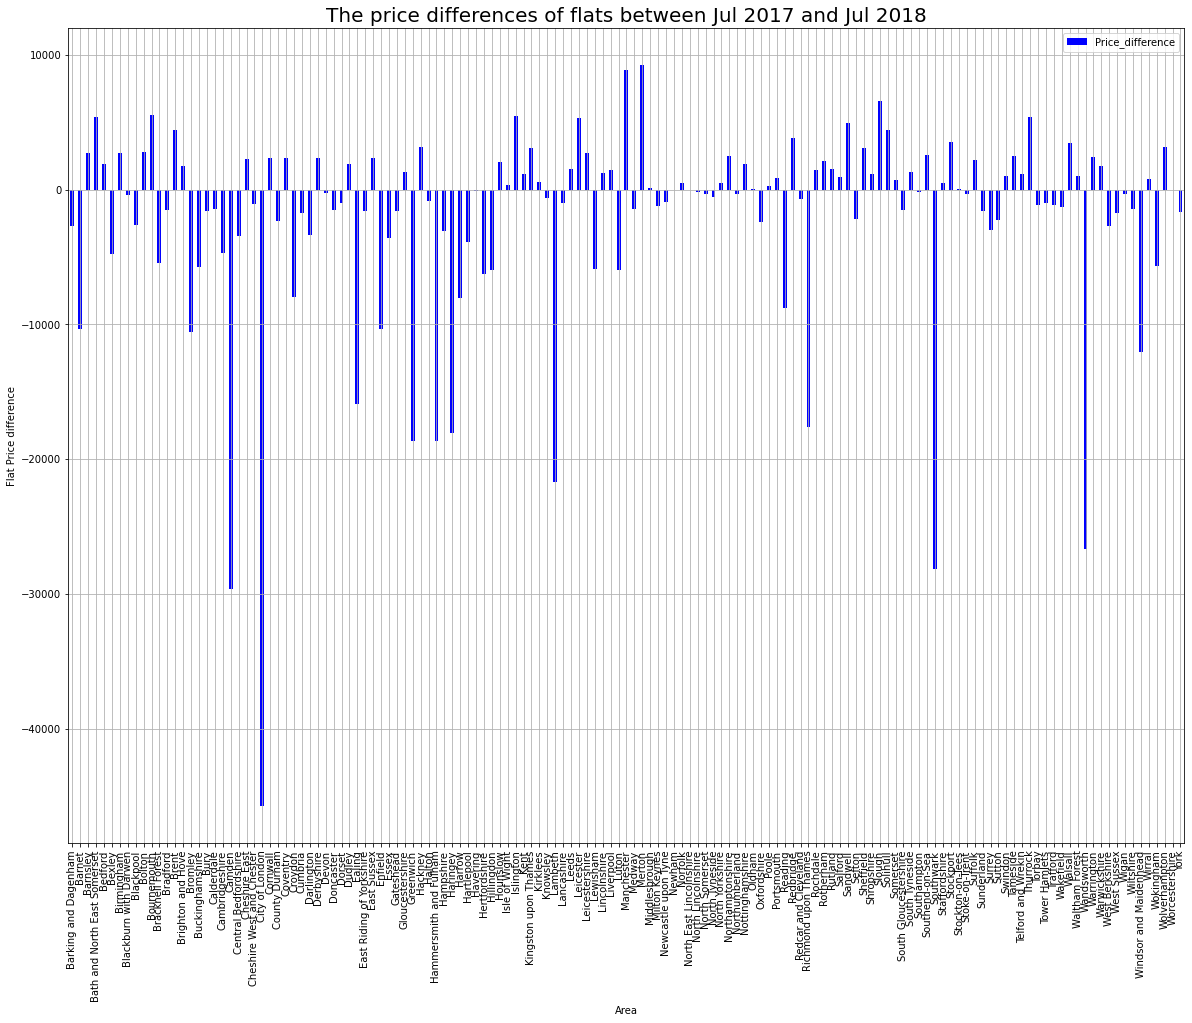

In [20]:
ax1 = flat_jul.plot.bar(x= 'Area',y='Price_difference' , color = 'blue', figsize = (20,15), grid=True)
ax1.set_ylabel('Flat Price difference')
ax1.set_title('The price differences of flats between Jul 2017 and Jul 2018', fontsize = 20)




The bar chart above looks at how the price difference between flats in July 2017 and flats in July 2018 differ in different areas across the country. The bar chart does show that the largest decrease in the flat price between July 2017 and July 2018 occured in the city of London. This would be incorrect as the average prices of flats in the City of London tend to quite high with minimal changes every year. The flat prices would tend to increase rather than increase when compared to the other areas across the country. The bar chart also showed that the largest increase in the average flat price occured outside of London. This would support the fact that the majority of flats in London tend to have a small increase in their prices over the years. The bar chart also shows that the majority of areas did see a decrease in the average price of flats over the 36 month period. 

In [21]:
p_diff= flat_jul.groupby(['RegionName']).Price_difference.sum()
p_diff.to_frame()

,Price_difference
RegionName,
East Midlands,17593.37497
East of England,-11327.65900
London,-278076.15480
North East,-13629.45084
North West,13744.12271
South East,-40250.81090
South West,11167.25880
West Midlands,27279.74818
Yorkshire and The Humber,1459.61932


Text(0.5, 1.0, 'The price differences of flats between Jul 2017 and Jul 2018')

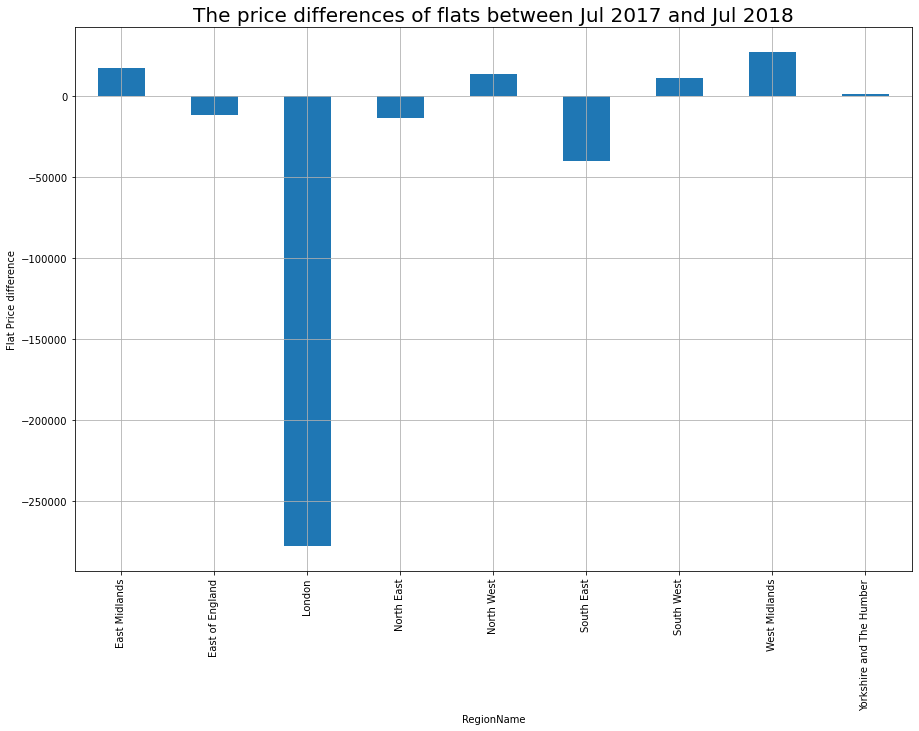

In [28]:
ax2 = p_diff.plot.bar(x='RegionName', y= 'Price_difference', figsize = (15,10), grid=True)
ax2.set_ylabel('Flat Price difference')
ax2.set_title('The price differences of flats between Jul 2017 and Jul 2018', fontsize = 20)

The graph above shows how the average flat prices between July 2017 and July 2018 change across the different regions. The graph above again shows that the largest decrease in flat prices occured in the London region. This large decrease in the London region could be due to the large decrease that occured in the City of London. The largest increase in the average flat prices was seen in the West Midlands region, with an increase of nearly 5,000.

# Section 4: Statistical Analysis

 ## *Section 4.1: Cross-tabulation of the number of areas in which prices have either increased or decrease*

In order to create the cross-tabulation the change in price needs to be classed as either an increase or decrease. This is done by assuming that any value in the price_difference column that is below zero being classed as a decrease and any value above zero being classed as an increase. A column containing the two classes is then added to the table below.

In [23]:


def ClassifactionCategory(column):
    if (column.Price_difference > 0  ) : return 'Increase'
    if (column.Price_difference < 0) : return 'Decrease'


flat_jul.apply(ClassifactionCategory, axis=1)

flat_jul = flat_jul.assign(Change = flat_jul.apply(ClassifactionCategory, axis=1))
flat_jul

,Area,RegionName,Flat_2017,Flat_2018,Price_difference,Change
0,Barking and Dagenham,London,233026.92790,230318.11740,-2708.81050,Decrease
1,Barnet,London,403492.77130,393139.28910,-10353.48220,Decrease
2,Barnsley,Yorkshire and The Humber,73054.06885,75808.74698,2754.67813,Increase
3,Bath and North East Somerset,South West,242441.16080,247866.66800,5425.50720,Increase
4,Bedford,East of England,167562.35620,169497.10010,1934.74390,Increase
...,...,...,...,...,...,...
136,Wirral,North West,102486.68380,103254.08380,767.40000,Increase
137,Wokingham,South East,233806.26640,228119.70330,-5686.56310,Decrease
138,Wolverhampton,West Midlands,81530.88640,84689.21896,3158.33256,Increase
139,Worcestershire,West Midlands,127758.55150,127751.56660,-6.98490,Decrease


*The table above shows the changes in price of flats between July 2017 and July 2018, including the two different classes*

In [24]:
a = pd.crosstab(index=[flat_jul['Change']], columns= [flat_jul['RegionName']])
a

RegionName,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands,Yorkshire and The Humber
Change,,,,,,,,,
Decrease,0,5,22,9,11,13,6,2,7
Increase,7,5,9,3,11,6,7,11,7


*The cross-tabulation above shows how the two different classes vary across the different regions*

## *Section 4.2: Chi-Square test*

The Chi-Square test below is used to determine whether there is evidence that the regions differ.

In [25]:
test_stat, p_value, dof, expected = stats.chi2_contingency(a, correction=False)

print('There are %d degrees of freedom' % dof)
print('The chi-squared test statistic is %4.2f' % test_stat)
print('The p-value is %4.3f %%' % (100 * p_value))

There are 8 degrees of freedom
The chi-squared test statistic is 23.86
The p-value is 0.242 %


The Chi-Square test produced a p-value greater than 0.05 which would result in the null hypothesis not being rejected. The results indicate that there is a relationship between the change in price of the Flats and the different regions.

In [26]:
a - expected.round(1)

RegionName,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands,Yorkshire and The Humber
Change,,,,,,,,,
Decrease,-3.7,-0.3,5.5,2.6,-0.7,2.9,-0.9,-4.9,-0.4
Increase,3.7,0.3,-5.5,-2.6,0.7,-2.9,0.9,4.9,0.4


The expected number of increases and decreases across the regions are shown in the table above.The expected value is subtracted from the original data, so that a positive number shows the that more were observed than expect under the assumption of uniform proportions. 